### Mask & Image Multiplier to obtain Brain Segment from Axial CTs

In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [7]:
import xlsxwriter
#from radiomics import featureextractor
import glob
import SimpleITK as sitk
import six
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

In [8]:
def trimmer(image,image_mask):
    x=np.where(image_mask.sum(axis=(0,1))>500)[0]
    y=np.where(image_mask.sum(axis=(1,2))>500)[0]
    z=np.where(image_mask.sum(axis=(0,2))>500)[0]
    return image[y[0]:y[-1],z[0]:z[-1],x[0]:x[-1]]

In [21]:
#imagePath = glob.glob("C:/Users/muham/Desktop/MSc BME/Medical Image Processing/Acute Ischemic Stroke - Project/transfer_data23/*.nii")
imagePath=glob.glob("/Volumes/PortableSSD/Project/transfer_data/*.nii")
for i in range(0,len(imagePath)):
    labelPath="/Volumes/PortableSSD/Project/predictions/"+imagePath[i].split('data/')[1]
    #labelPath = "C:/Users/muham/Desktop/MSc BME/Medical Image Processing/Acute Ischemic Stroke - Project/transfer_data23/masks/unet_CT_SS_2023530_115030/predictions/"+imagePath[i].split('data23/')[1]
    imgPath=imagePath[i]
    img = sitk.ReadImage(imgPath)
    Direction=img.GetDirection()
    img = sitk.GetArrayFromImage(img)
    seg = sitk.ReadImage(labelPath)
    seg = sitk.GetArrayFromImage(seg)
    mask = seg
    image = img
    seg[seg>0]=1
    outputImg = img * (seg==1)
    OutImage=trimmer(outputImg,seg)
    result_image = sitk.GetImageFromArray(OutImage)
    result_image.SetDirection(Direction)
#result_image.CopyInformation(sitk.ReadImage(imagePath))

# write the image
    Path="/Volumes/PortableSSD/Project/"+imagePath[i].split('data/')[1]
    sitk.WriteImage(result_image, Path)



IndexError: list index out of range

In [20]:
imagePath

['C:/Users/muham/Desktop/MSc BME/Medical Image Processing/Acute Ischemic Stroke - Project/transfer_data23\\1.2.410.200010.20230508.145831.100041.124908_Beyin+Boyun_Anjio_Head_20230504005400_702.nii',
 'C:/Users/muham/Desktop/MSc BME/Medical Image Processing/Acute Ischemic Stroke - Project/transfer_data23\\1.2.410.200010.20230508.150231.119978.108731_Beyin+Boyun_Anjio_Head_20230503211150_602.nii',
 'C:/Users/muham/Desktop/MSc BME/Medical Image Processing/Acute Ischemic Stroke - Project/transfer_data23\\1.2.410.200010.20230508.150658.121564.104409_Beyin+Boyun_Anjio_Head_20230503213027_802.nii',
 'C:/Users/muham/Desktop/MSc BME/Medical Image Processing/Acute Ischemic Stroke - Project/transfer_data23\\1.2.410.200010.20230508.152021.107840.110242_Beyin+Boyun_Anjio_Head_20230503141154_501.nii',
 'C:/Users/muham/Desktop/MSc BME/Medical Image Processing/Acute Ischemic Stroke - Project/transfer_data23\\1.2.410.200010.20230509.190211.130906.115861_BEYIN_BT_Head_20230502211409_204.nii',
 'C:/User

In [22]:
labelPath

'C:/Users/muham/Desktop/MSc BME/Medical Image Processing/Acute Ischemic Stroke - Project/transfer_data23/masks/unet_CT_SS_2023530_115030/predictions/*.nii'

In [25]:
imagePath="C:/Users/muham/Desktop/MSc BME/Medical Image Processing/Acute Ischemic Stroke - Project/1.2.410.200010.20230508.145831.100041.127011_Beyin+Boyun_Anjio_Head_20230504005400_201img.nii"
#imagePath="/Volumes/Elements/transfer_data/1.2.410.200010.20230508.152021.107840.110242_Beyin+Boyun_Anjio_Head_20230503141154_501.nii"

In [26]:
labelPath="C:/Users/muham/Desktop/MSc BME/Medical Image Processing/Acute Ischemic Stroke - Project/1.2.410.200010.20230508.145831.100041.127011_Beyin+Boyun_Anjio_Head_20230504005400_201.nii"
#labelPath="/Volumes/Elements/predictions/1.2.410.200010.20230508.152021.107840.110242_Beyin+Boyun_Anjio_Head_20230503141154_501.nii"

In [27]:
img = sitk.ReadImage(imagePath)
Direction=img.GetDirection()
img = sitk.GetArrayFromImage(img)
seg = sitk.ReadImage(labelPath)
seg = sitk.GetArrayFromImage(seg)
mask = seg
image = img

In [28]:
img.shape

(119, 512, 512)

In [29]:
seg.shape

(119, 512, 512)

Text(0.5, 1.0, 'Overlapped Images')

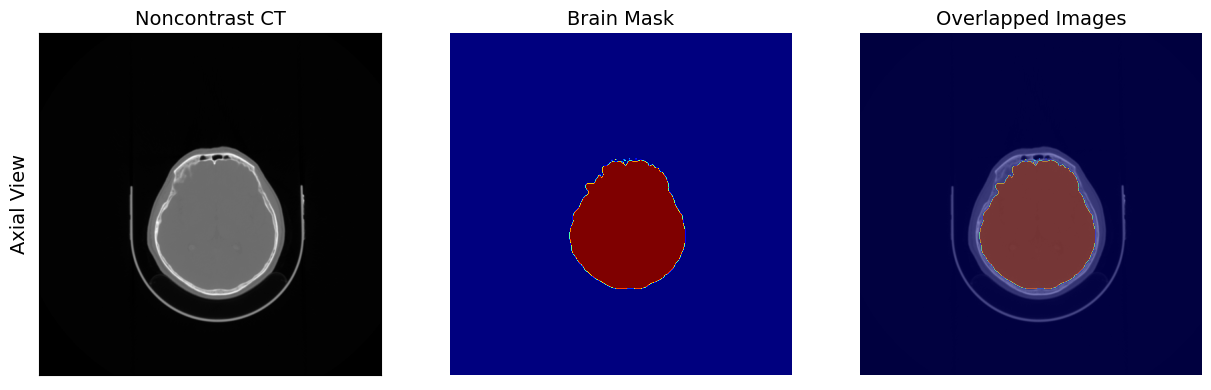

In [30]:
#----Lets plot 
f, axarr = plt.subplots(1,3,figsize=(15,15))
axarr[0].imshow(np.squeeze(image[100,:,:]), cmap='gray',origin='lower');
axarr[0].set_ylabel('Axial View',fontsize=14)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_title('Noncontrast CT',fontsize=14)

axarr[1].imshow(np.squeeze(mask[100,:,:]), cmap='jet',origin='lower');
axarr[1].axis('off')
axarr[1].set_title('Brain Mask',fontsize=14)

axarr[2].imshow(np.squeeze(image[100,:,:]), cmap='gray',alpha=1,origin='lower');
axarr[2].imshow(np.squeeze(mask[100,:,:]),cmap='jet',alpha=0.5,origin='lower');
axarr[2].axis('off')
axarr[2].set_title('Overlapped Images',fontsize=14)
#plt.tight_layout()
#plt.subplots_adjust(wspace=0, hspace=0)

In [31]:
plane=[]
row=[]
column=[]
for i in range(0,seg.shape[0]):
    if  np.sum(seg[i,:,:])>0:
        plane.append(i)
for k in range(0,seg.shape[1]):
    if  np.sum(seg[:,k,:])>0:
        row.append(k)
for r in range(0,seg.shape[2]):
    if  np.sum(seg[:,:,r])>0:
        column.append(r)

In [32]:
plane

[20,
 21,
 22,
 23,
 24,
 25,
 26,
 29,
 30,
 57,
 59,
 63,
 64,
 65,
 72,
 77,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118]

In [33]:
plt.imshow(np.squeeze(OutImage[30,:,:]),origin='lower',cmap='gray');

NameError: name 'OutImage' is not defined

In [ ]:
OutImage.shape